In [1]:
import glob
import os

import pandas as pd
import seaborn as sns
%matplotlib inline


import sourmash_utils

Don't care about too many figures open

In [2]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

In [3]:
import common

# this only works for notebooks using tokens
# figure_folder = common.get_figure_folder()
figure_folder = os.path.join('..', 'figures', '075_visualize_knn_graph_on_similarities')
! mkdir -p $figure_folder
figure_folder

'../figures/075_visualize_knn_graph_on_similarities'

In [4]:
prefix = '/mnt/data/10X_P4_3/sourmash_compare/'
basename = 'possorted_genome_bam__k27_dna_ignore-abundance=True.csv'
csv = f'{prefix}{basename}'

bladder_dna_k27_ignore, bladder_dna_k27_ignore_metadata = sourmash_utils.read_compare(csv)
print('bladder_dna_k27_ignore.shape', bladder_dna_k27_ignore.shape)
print('bladder_dna_k27_ignore_metadata.shape', bladder_dna_k27_ignore_metadata.shape)
bladder_dna_k27_ignore_metadata.head()

bladder_dna_k27_ignore.shape (148, 148)
bladder_dna_k27_ignore_metadata.shape (148, 6)


column,cell_ontology_class,free_annotation,mouse_id,tissue,cell_ontology_free_annotation,method
cell_id,,,,,,
10X_P4_3_GAATAAGGTCGGCATC,bladder urothelial cell,Basal_bladder_epithelial_cell,3-M-8,Bladder,bladder_urothelial_cell (Basal_bladder_epithel...,10x
10X_P4_3_GCGAGAACACATGGGA,bladder cell,Bladder_mesenchymal_cell,3-M-8,Bladder,bladder_cell (Bladder_mesenchymal_cell),10x
10X_P4_3_CAGAATCTCTCAAGTG,bladder cell,Bladder_mesenchymal_cell,3-M-8,Bladder,bladder_cell (Bladder_mesenchymal_cell),10x
10X_P4_3_GTCTCGTCAAACTGTC,bladder cell,Bladder_mesenchymal_cell,3-M-8,Bladder,bladder_cell (Bladder_mesenchymal_cell),10x
10X_P4_3_CTTGGCTCACGAAACG,bladder urothelial cell,Basal_bladder_epithelial_cell,3-M-8,Bladder,bladder_urothelial_cell (Basal_bladder_epithel...,10x


In [5]:
bladder_dna_k27_ignore.head()

cell_id,10X_P4_3_GAATAAGGTCGGCATC,10X_P4_3_GCGAGAACACATGGGA,10X_P4_3_CAGAATCTCTCAAGTG,10X_P4_3_GTCTCGTCAAACTGTC,10X_P4_3_CTTGGCTCACGAAACG,10X_P4_3_GCTGCTTTCAAAGTAG,10X_P4_3_CTGCTGTTCGTTACGA,10X_P4_3_ACGGGCTGTCTGATCA,10X_P4_3_AACTCTTAGTTGCAGG,10X_P4_3_GTAACGTTCAGGCGAA,...,10X_P4_3_GGACAGACATTCACTT,10X_P4_3_TAAGAGAAGCTATGCT,10X_P4_3_CGATTGATCTAACTTC,10X_P4_3_AGTCTTTAGCTAGTGG,10X_P4_3_ACTTTCAAGATGGGTC,10X_P4_3_GAAGCAGCACCGATAT,10X_P4_3_GAGGTGATCCAGTATG,10X_P4_3_TAAGCGTAGAAACCGC,10X_P4_3_GGCGTGTCATTGGGCC,10X_P4_3_AGGGTGACAGTCGTGC
cell_id,,,,,,,,,,,,,,,,,,,,,
10X_P4_3_GAATAAGGTCGGCATC,1.000000,0.048187,0.054206,0.051888,0.055425,0.061628,0.067966,0.046853,0.060475,0.051632,...,0.048236,0.070338,0.040882,0.031813,0.056914,0.054317,0.049975,0.065773,0.054936,0.053260
10X_P4_3_GCGAGAACACATGGGA,0.048187,1.000000,0.057647,0.059127,0.040069,0.046721,0.047122,0.055007,0.049270,0.060431,...,0.052632,0.051763,0.027851,0.032043,0.042379,0.061275,0.062163,0.042244,0.066667,0.066348
10X_P4_3_CAGAATCTCTCAAGTG,0.054206,0.057647,1.000000,0.061649,0.039891,0.046865,0.050270,0.055483,0.051822,0.059230,...,0.055253,0.051650,0.030952,0.039321,0.043734,0.061324,0.061920,0.047372,0.069646,0.061043
10X_P4_3_GTCTCGTCAAACTGTC,0.051888,0.059127,0.061649,1.000000,0.041661,0.049122,0.050192,0.058385,0.046686,0.059034,...,0.056963,0.051345,0.030995,0.036312,0.043684,0.063741,0.057874,0.050464,0.072633,0.062310
10X_P4_3_CTTGGCTCACGAAACG,0.055425,0.040069,0.039891,0.041661,1.000000,0.064836,0.065840,0.030543,0.059099,0.034130,...,0.042378,0.066649,0.031569,0.017455,0.049858,0.046683,0.038906,0.064099,0.039447,0.038920


In [6]:
bladder_dna_k27_ignore_masked = bladder_dna_k27_ignore[bladder_dna_k27_ignore < 1]
bladder_dna_k27_ignore_masked = bladder_dna_k27_ignore_masked.fillna(0)
bladder_dna_k27_ignore_masked.head()

cell_id,10X_P4_3_GAATAAGGTCGGCATC,10X_P4_3_GCGAGAACACATGGGA,10X_P4_3_CAGAATCTCTCAAGTG,10X_P4_3_GTCTCGTCAAACTGTC,10X_P4_3_CTTGGCTCACGAAACG,10X_P4_3_GCTGCTTTCAAAGTAG,10X_P4_3_CTGCTGTTCGTTACGA,10X_P4_3_ACGGGCTGTCTGATCA,10X_P4_3_AACTCTTAGTTGCAGG,10X_P4_3_GTAACGTTCAGGCGAA,...,10X_P4_3_GGACAGACATTCACTT,10X_P4_3_TAAGAGAAGCTATGCT,10X_P4_3_CGATTGATCTAACTTC,10X_P4_3_AGTCTTTAGCTAGTGG,10X_P4_3_ACTTTCAAGATGGGTC,10X_P4_3_GAAGCAGCACCGATAT,10X_P4_3_GAGGTGATCCAGTATG,10X_P4_3_TAAGCGTAGAAACCGC,10X_P4_3_GGCGTGTCATTGGGCC,10X_P4_3_AGGGTGACAGTCGTGC
cell_id,,,,,,,,,,,,,,,,,,,,,
10X_P4_3_GAATAAGGTCGGCATC,0.000000,0.048187,0.054206,0.051888,0.055425,0.061628,0.067966,0.046853,0.060475,0.051632,...,0.048236,0.070338,0.040882,0.031813,0.056914,0.054317,0.049975,0.065773,0.054936,0.053260
10X_P4_3_GCGAGAACACATGGGA,0.048187,0.000000,0.057647,0.059127,0.040069,0.046721,0.047122,0.055007,0.049270,0.060431,...,0.052632,0.051763,0.027851,0.032043,0.042379,0.061275,0.062163,0.042244,0.066667,0.066348
10X_P4_3_CAGAATCTCTCAAGTG,0.054206,0.057647,0.000000,0.061649,0.039891,0.046865,0.050270,0.055483,0.051822,0.059230,...,0.055253,0.051650,0.030952,0.039321,0.043734,0.061324,0.061920,0.047372,0.069646,0.061043
10X_P4_3_GTCTCGTCAAACTGTC,0.051888,0.059127,0.061649,0.000000,0.041661,0.049122,0.050192,0.058385,0.046686,0.059034,...,0.056963,0.051345,0.030995,0.036312,0.043684,0.063741,0.057874,0.050464,0.072633,0.062310
10X_P4_3_CTTGGCTCACGAAACG,0.055425,0.040069,0.039891,0.041661,0.000000,0.064836,0.065840,0.030543,0.059099,0.034130,...,0.042378,0.066649,0.031569,0.017455,0.049858,0.046683,0.038906,0.064099,0.039447,0.038920


In [7]:
from sklearn.neighbors import NearestNeighbors

In [8]:
# Convert to distances by subtracting from 1
X = 1 - bladder_dna_k27_ignore_masked

# Set self-distance to be largest
# X[X == 0] = 100
X.head()

cell_id,10X_P4_3_GAATAAGGTCGGCATC,10X_P4_3_GCGAGAACACATGGGA,10X_P4_3_CAGAATCTCTCAAGTG,10X_P4_3_GTCTCGTCAAACTGTC,10X_P4_3_CTTGGCTCACGAAACG,10X_P4_3_GCTGCTTTCAAAGTAG,10X_P4_3_CTGCTGTTCGTTACGA,10X_P4_3_ACGGGCTGTCTGATCA,10X_P4_3_AACTCTTAGTTGCAGG,10X_P4_3_GTAACGTTCAGGCGAA,...,10X_P4_3_GGACAGACATTCACTT,10X_P4_3_TAAGAGAAGCTATGCT,10X_P4_3_CGATTGATCTAACTTC,10X_P4_3_AGTCTTTAGCTAGTGG,10X_P4_3_ACTTTCAAGATGGGTC,10X_P4_3_GAAGCAGCACCGATAT,10X_P4_3_GAGGTGATCCAGTATG,10X_P4_3_TAAGCGTAGAAACCGC,10X_P4_3_GGCGTGTCATTGGGCC,10X_P4_3_AGGGTGACAGTCGTGC
cell_id,,,,,,,,,,,,,,,,,,,,,
10X_P4_3_GAATAAGGTCGGCATC,1.000000,0.951813,0.945794,0.948112,0.944575,0.938372,0.932034,0.953147,0.939525,0.948368,...,0.951764,0.929662,0.959118,0.968187,0.943086,0.945683,0.950025,0.934227,0.945064,0.946740
10X_P4_3_GCGAGAACACATGGGA,0.951813,1.000000,0.942353,0.940873,0.959931,0.953279,0.952878,0.944993,0.950730,0.939569,...,0.947368,0.948237,0.972149,0.967957,0.957621,0.938725,0.937837,0.957756,0.933333,0.933652
10X_P4_3_CAGAATCTCTCAAGTG,0.945794,0.942353,1.000000,0.938351,0.960109,0.953135,0.949730,0.944517,0.948178,0.940770,...,0.944747,0.948350,0.969048,0.960679,0.956266,0.938676,0.938080,0.952628,0.930354,0.938957
10X_P4_3_GTCTCGTCAAACTGTC,0.948112,0.940873,0.938351,1.000000,0.958339,0.950878,0.949808,0.941615,0.953314,0.940966,...,0.943037,0.948655,0.969005,0.963688,0.956316,0.936259,0.942126,0.949536,0.927367,0.937690
10X_P4_3_CTTGGCTCACGAAACG,0.944575,0.959931,0.960109,0.958339,1.000000,0.935164,0.934160,0.969457,0.940901,0.965870,...,0.957622,0.933351,0.968431,0.982545,0.950142,0.953317,0.961094,0.935901,0.960553,0.961080


In [9]:
nbrs = NearestNeighbors(n_neighbors=5, metric='precomputed').fit(X)
nbrs

NearestNeighbors(algorithm='auto', leaf_size=30, metric='precomputed',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [10]:
distances, indices = nbrs.kneighbors(X)

In [11]:
colors = sourmash_utils.category_colors(bladder_dna_k27_ignore_metadata['cell_ontology_class'], 
                               palette='tab10')

In [12]:
bladder_dna_k27_ignore_metadata['cell_ontology_class_color'] = colors
bladder_dna_k27_ignore_metadata.head()

column,cell_ontology_class,free_annotation,mouse_id,tissue,cell_ontology_free_annotation,method,cell_ontology_class_color
cell_id,,,,,,,
10X_P4_3_GAATAAGGTCGGCATC,bladder urothelial cell,Basal_bladder_epithelial_cell,3-M-8,Bladder,bladder_urothelial_cell (Basal_bladder_epithel...,10x,#ff7f0e
10X_P4_3_GCGAGAACACATGGGA,bladder cell,Bladder_mesenchymal_cell,3-M-8,Bladder,bladder_cell (Bladder_mesenchymal_cell),10x,#1f77b4
10X_P4_3_CAGAATCTCTCAAGTG,bladder cell,Bladder_mesenchymal_cell,3-M-8,Bladder,bladder_cell (Bladder_mesenchymal_cell),10x,#1f77b4
10X_P4_3_GTCTCGTCAAACTGTC,bladder cell,Bladder_mesenchymal_cell,3-M-8,Bladder,bladder_cell (Bladder_mesenchymal_cell),10x,#1f77b4
10X_P4_3_CTTGGCTCACGAAACG,bladder urothelial cell,Basal_bladder_epithelial_cell,3-M-8,Bladder,bladder_urothelial_cell (Basal_bladder_epithel...,10x,#ff7f0e


In [13]:
import networkx as nx

G = nx.Graph()
G

bladder_dna_k27_ignore_metadata_reset = bladder_dna_k27_ignore_metadata.reset_index()
bladder_dna_k27_ignore_metadata_reset = bladder_dna_k27_ignore_metadata_reset.rename(
    columns={'cell_id': 'label'})
bladder_dna_k27_ignore_metadata_reset.head()

column,label,cell_ontology_class,free_annotation,mouse_id,tissue,cell_ontology_free_annotation,method,cell_ontology_class_color
0,10X_P4_3_GAATAAGGTCGGCATC,bladder urothelial cell,Basal_bladder_epithelial_cell,3-M-8,Bladder,bladder_urothelial_cell (Basal_bladder_epithel...,10x,#ff7f0e
1,10X_P4_3_GCGAGAACACATGGGA,bladder cell,Bladder_mesenchymal_cell,3-M-8,Bladder,bladder_cell (Bladder_mesenchymal_cell),10x,#1f77b4
2,10X_P4_3_CAGAATCTCTCAAGTG,bladder cell,Bladder_mesenchymal_cell,3-M-8,Bladder,bladder_cell (Bladder_mesenchymal_cell),10x,#1f77b4
3,10X_P4_3_GTCTCGTCAAACTGTC,bladder cell,Bladder_mesenchymal_cell,3-M-8,Bladder,bladder_cell (Bladder_mesenchymal_cell),10x,#1f77b4
4,10X_P4_3_CTTGGCTCACGAAACG,bladder urothelial cell,Basal_bladder_epithelial_cell,3-M-8,Bladder,bladder_urothelial_cell (Basal_bladder_epithel...,10x,#ff7f0e


In [14]:
range(2)

range(0, 2)

In [15]:
bladder_cell = sourmash_utils.get_single_cell(sourmash_utils.BLADDER_CELL_ID, bladder_dna_k27_ignore,
                              bladder_dna_k27_ignore_metadata, name='bladder_dna_k27_ignore',
                              ksize=27, ignore_abundance=True)
bladder_cell.head(10)

,similarity,cell_ontology_class,free_annotation,mouse_id,tissue,cell_ontology_free_annotation,method,cell_ontology_class_color,name,ksize,ignore_abundance
cell_id,,,,,,,,,,,
10X_P4_3_GCGAGAACACATGGGA,1.000000,bladder cell,Bladder_mesenchymal_cell,3-M-8,Bladder,bladder_cell (Bladder_mesenchymal_cell),10x,#1f77b4,bladder_dna_k27_ignore,27,True
10X_P4_3_GCGAGAATCCCTCTTT,0.070379,bladder cell,Bladder_mesenchymal_cell,3-M-8,Bladder,bladder_cell (Bladder_mesenchymal_cell),10x,#1f77b4,bladder_dna_k27_ignore,27,True
10X_P4_3_GTATCTTGTAGAGGAA,0.068249,bladder cell,Bladder_mesenchymal_cell,3-M-8,Bladder,bladder_cell (Bladder_mesenchymal_cell),10x,#1f77b4,bladder_dna_k27_ignore,27,True
10X_P4_3_CTAGAGTGTCATATCG,0.067464,bladder cell,Bladder_mesenchymal_cell,3-M-8,Bladder,bladder_cell (Bladder_mesenchymal_cell),10x,#1f77b4,bladder_dna_k27_ignore,27,True
10X_P4_3_CCGGTAGCAGTGGGAT,0.066925,bladder cell,Bladder_mesenchymal_cell,3-M-8,Bladder,bladder_cell (Bladder_mesenchymal_cell),10x,#1f77b4,bladder_dna_k27_ignore,27,True
10X_P4_3_GTAGTCAAGACGACGT,0.066748,bladder cell,Bladder_mesenchymal_cell,3-M-8,Bladder,bladder_cell (Bladder_mesenchymal_cell),10x,#1f77b4,bladder_dna_k27_ignore,27,True
10X_P4_3_GGCGTGTCATTGGGCC,0.066667,bladder cell,Bladder_mesenchymal_cell,3-M-8,Bladder,bladder_cell (Bladder_mesenchymal_cell),10x,#1f77b4,bladder_dna_k27_ignore,27,True
10X_P4_3_AGGGTGACAGTCGTGC,0.066348,bladder cell,Bladder_mesenchymal_cell,3-M-8,Bladder,bladder_cell (Bladder_mesenchymal_cell),10x,#1f77b4,bladder_dna_k27_ignore,27,True
10X_P4_3_GGCTCGAAGCGTGAGT,0.065430,bladder cell,Bladder_mesenchymal_cell,3-M-8,Bladder,bladder_cell (Bladder_mesenchymal_cell),10x,#1f77b4,bladder_dna_k27_ignore,27,True


In [16]:
import networkx as nx

G = nx.Graph()
G

# bladder_dna_k27_ignore_metadata_reset = bladder_dna_k27_ignore_metadatare

nodes = [(cell_id, attr.to_dict()) for cell_id, attr in bladder_dna_k27_ignore_metadata.iterrows()]

G.add_nodes_from(nodes)

In [17]:
# for cell_id, attributes in nodes:
#     G.add_node(cell_id, **attributes)

In [18]:
G.nodes['10X_P4_3_GAATAAGGTCGGCATC']

{'cell_ontology_class': 'bladder urothelial cell',
 'free_annotation': 'Basal_bladder_epithelial_cell',
 'mouse_id': '3-M-8',
 'tissue': 'Bladder',
 'cell_ontology_free_annotation': 'bladder_urothelial_cell (Basal_bladder_epithelial_cell)',
 'method': '10x',
 'cell_ontology_class_color': '#ff7f0e'}

In [19]:
neighbor_indices = pd.DataFrame(indices, index=X.index)
neighbor_indices = neighbor_indices.applymap(lambda x: X.index[x])
neighbor_indices.head()

,0,1,2,3,4
cell_id,,,,,
10X_P4_3_GAATAAGGTCGGCATC,10X_P4_3_CCGTGGAGTGAGGGTT,10X_P4_3_TAAGAGAAGCTATGCT,10X_P4_3_GCATGATCATATGGTC,10X_P4_3_CTGCTGTTCGTTACGA,10X_P4_3_AGTGAGGTCAGCATGT
10X_P4_3_GCGAGAACACATGGGA,10X_P4_3_GCGAGAATCCCTCTTT,10X_P4_3_GTATCTTGTAGAGGAA,10X_P4_3_CTAGAGTGTCATATCG,10X_P4_3_CCGGTAGCAGTGGGAT,10X_P4_3_GTAGTCAAGACGACGT
10X_P4_3_CAGAATCTCTCAAGTG,10X_P4_3_TCTTCGGGTTTAGGAA,10X_P4_3_GGCGTGTCATTGGGCC,10X_P4_3_GGCTCGAAGCGTGAGT,10X_P4_3_TGGACGCTCCGATATG,10X_P4_3_TTGGCAAGTCCGTTAA
10X_P4_3_GTCTCGTCAAACTGTC,10X_P4_3_GGCGTGTCATTGGGCC,10X_P4_3_CACCTTGAGGACCACA,10X_P4_3_CCGGTAGCAGTGGGAT,10X_P4_3_ATTTCTGGTCAGGACA,10X_P4_3_GTCATTTGTCTTGCGG
10X_P4_3_CTTGGCTCACGAAACG,10X_P4_3_CCGGTAGAGGCAGTCA,10X_P4_3_TTGGCAACATGATCCA,10X_P4_3_GTGGGTCAGATGTGGC,10X_P4_3_TGGCTGGGTCGCTTCT,10X_P4_3_CGTGAGCGTGCACTTA


In [20]:
# distances

In [21]:
neighbor_indices_tidy = neighbor_indices.unstack()
neighbor_indices_tidy = neighbor_indices_tidy.reset_index()
neighbor_indices_tidy = neighbor_indices_tidy.drop(columns='level_0')
neighbor_indices_tidy.head()

,cell_id,0
0,10X_P4_3_GAATAAGGTCGGCATC,10X_P4_3_CCGTGGAGTGAGGGTT
1,10X_P4_3_GCGAGAACACATGGGA,10X_P4_3_GCGAGAATCCCTCTTT
2,10X_P4_3_CAGAATCTCTCAAGTG,10X_P4_3_TCTTCGGGTTTAGGAA
3,10X_P4_3_GTCTCGTCAAACTGTC,10X_P4_3_GGCGTGTCATTGGGCC
4,10X_P4_3_CTTGGCTCACGAAACG,10X_P4_3_CCGGTAGAGGCAGTCA


In [22]:
neighbor_indices_tidy.head().values

array([['10X_P4_3_GAATAAGGTCGGCATC', '10X_P4_3_CCGTGGAGTGAGGGTT'],
       ['10X_P4_3_GCGAGAACACATGGGA', '10X_P4_3_GCGAGAATCCCTCTTT'],
       ['10X_P4_3_CAGAATCTCTCAAGTG', '10X_P4_3_TCTTCGGGTTTAGGAA'],
       ['10X_P4_3_GTCTCGTCAAACTGTC', '10X_P4_3_GGCGTGTCATTGGGCC'],
       ['10X_P4_3_CTTGGCTCACGAAACG', '10X_P4_3_CCGGTAGAGGCAGTCA']],
      dtype=object)

In [23]:
G.add_edges_from(neighbor_indices_tidy.values)

In [24]:
G

In [25]:
type(G.node_dict_factory)

type

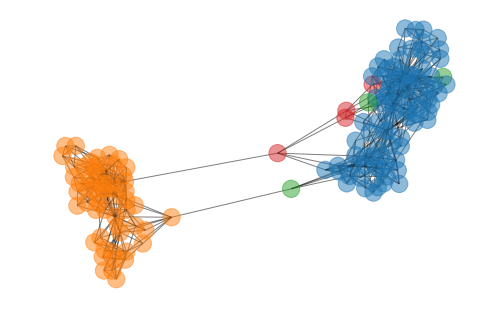

In [26]:
nx.draw(G, node_color=[d['cell_ontology_class_color'] for v, d in G.nodes(data=True)], 
                       pos=nx.spring_layout(G, seed=0), alpha=0.5)

In [161]:
%%file knn.py
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from sklearn.neighbors import NearestNeighbors

import sourmash_utils


def _compute_neighbor_adjacencies(data, n_neighbors=5):
    # Convert to distances by subtracting from 1
    X = 1 - data
    nbrs = NearestNeighbors(n_neighbors=n_neighbors, metric='precomputed').fit(X)
    distances, indices = nbrs.kneighbors(X)
    
    # Replace integers with cell ids
    neighbor_indices = pd.DataFrame(indices, index=X.index)
    neighbor_indices = neighbor_indices.applymap(lambda x: X.index[x])
    
    # Make (cell_1, cell_2) adjacency list
    neighbor_indices_tidy = neighbor_indices.unstack()
    neighbor_indices_tidy = neighbor_indices_tidy.reset_index()
    neighbor_indices_tidy = neighbor_indices_tidy.drop(columns='level_0')
    return neighbor_indices_tidy.values


def add_color_cols(metadata, color_cols=['cell_ontology_class'], 
                           palettes=dict(cell_ontology_class='tab10')):
    """Add a hexadecimal color for the categorical values in color_cols"""
    for col in color_cols:
        palette = palettes[col]    
        colors = sourmash_utils.category_colors(metadata[col], 
                                   palette=palette)
        new_col = f'{col}_color'
        metadata[new_col] = colors
    return metadata


def nearest_neighbor_graph(data, metadata, n_neighbors=5, 
                           color_cols=['cell_ontology_class'], 
                           palettes=dict(cell_ontology_class='tab10')):
    metadata = add_color_cols(metadata, color_cols=color_cols, palettes=palettes)
    
    G = nx.Graph()
    nodes = [(cell_id, attr.to_dict()) for cell_id, attr in metadata.iterrows()]
    G.add_nodes_from(nodes)
    
    neighbor_adjacencies = _compute_neighbor_adjacencies(data, n_neighbors=n_neighbors)
    G.add_edges_from(neighbor_adjacencies)
    return G

def _add_legend(colors, labels, title):
    label_color_df = pd.DataFrame(dict(colors=colors, labels=labels))
    label_color_df = label_color_df.drop_duplicates()
    label_color_df = label_color_df.sort_values('labels')

    legend_elements = [Line2D([0], [0], color='w', marker='o', markersize=10,
                              markerfacecolor=color, label=label, alpha=0.5)
                       for i, (color, label) in label_color_df.iterrows()]

    ax = plt.gca()
    ax.legend(handles=legend_elements, title=title, frameon=False)
    return ax


def draw_graph(G, label_col='cell_ontology_class', edge_color='black', legend=True,
               **kwargs):
    label_color_col = f"{label_col}_color"

    colors = [d[label_color_col] for v, d in G.nodes(data=True)]
    labels = [d[label_col] for v, d in G.nodes(data=True)]
    
    if 'pos' not in kwargs:
        kwargs['pos'] = nx.spring_layout(G)
    nx.draw(G, node_color=colors, alpha=0.5, **kwargs)
    
    if legend:
        _add_legend(colors, labels, label_col)

Overwriting knn.py


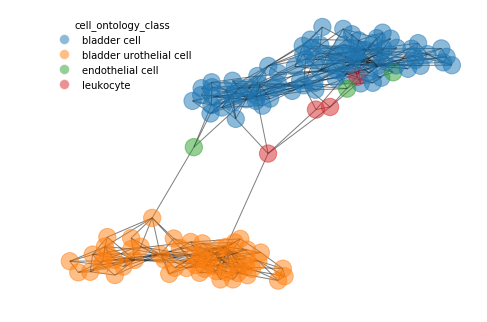

In [131]:
# import networkx as nx

# nx.draw_networkx?

import numpy as np

import knn

bladder_graph = knn.nearest_neighbor_graph(bladder_dna_k27_ignore, bladder_dna_k27_ignore_metadata)
bladder_graph

# nx.draw_networkx_nodes??

# ax.scatter??

# [G.nodes(data=True)

from matplotlib.lines import Line2D

metadata = bladder_dna_k27_ignore_metadata

knn.draw_graph(bladder_graph)



In [132]:
pathcollection = ax.collections[0]
pathcollection

In [139]:
pathcollection.get_label()

'_collection0'

In [140]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [141]:
s3_prefix = 's3://olgabot-maca/10x_vs_facs/sourmash_compare/'
csv = f'{s3_prefix}tenx=Bladder-Lung_facs=Bladder-Lung_molecule=dna_ksize=27_ignore-abundance=True.csv'


data, metadata = sourmash_utils.read_compare(csv)


In [142]:
# metadata.sort_index()

In [143]:
metadata.head()

,cell_ontology_class,tissue,mouse_id,free_annotation,subtissue,cell_ontology_free_annotation,method
cell_id,,,,,,,
A1-MAA001847-3_39_F-1-1,lung endothelial cell,Lung,NaN,nan,EPCAM,lung_endothelial_cell (nan),FACS
D22-MAA001892-3_38_F-1-1,B cell,Lung,NaN,nan,Endomucin,B_cell (nan),FACS
J6-MAA000839-3_11_M-1-1,lung endothelial cell,Lung,NaN,nan,nan,lung_endothelial_cell (nan),FACS
N22-MAA001847-3_39_F-1-1,B cell,Lung,NaN,nan,EPCAM,B_cell (nan),FACS
G9-MAA001847-3_39_F-1-1,epithelial cell of lung,Lung,NaN,alveolar_epithelial_type_1_cells,EPCAM,epithelial_cell_of_lung (alveolar_epithelial_t...,FACS


In [144]:
col = 'cell_ontology_class'
palette = 'tab20'


bladder_lung_10x_facs_colors = sourmash_utils.category_colors(metadata[col], 
                                   palette=palette)
bladder_lung_10x_facs_colors.sort_index().head()

cell_id
/mnt/data/10X_P7_8/possorted_genome_bam.bam      #262626
/mnt/data/10X_P7_8/possorted_genome_bam.bam.1    #262626
/mnt/data/10X_P7_8/possorted_genome_bam.bam.2    #262626
/mnt/data/10X_P7_8/possorted_genome_bam.bam.3    #262626
10X_P4_3_AACCGCGTCCAACCAA                        #ff7f0e
Name: cell_ontology_class, dtype: object

In [145]:
palettes = dict(tissue='YlGn', cell_ontology_class='tab20', method='Greys')
color_cols = ['cell_ontology_class', 'tissue', 'method']

bladder_lung_facs_10x = knn.nearest_neighbor_graph(data, metadata, 
                                               color_cols=color_cols, palettes=palettes)

In [146]:
pos = nx.spring_layout(bladder_lung_facs_10x, seed=0)

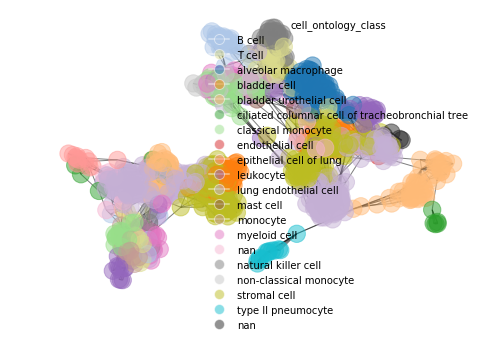

In [147]:
knn.draw_graph(bladder_lung_facs_10x, edge_color='black', pos=pos)

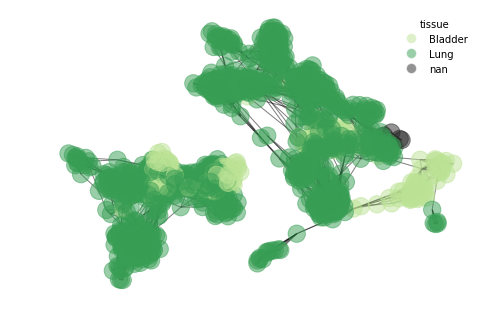

In [148]:
knn.draw_graph(bladder_lung_facs_10x, label_col='tissue', edge_color='black', pos=pos)

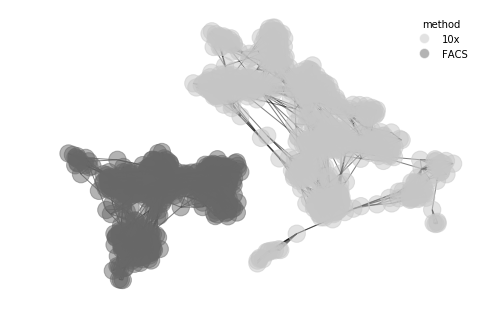

In [149]:
knn.draw_graph(bladder_lung_facs_10x, label_col='method', edge_color='black', pos=pos, )


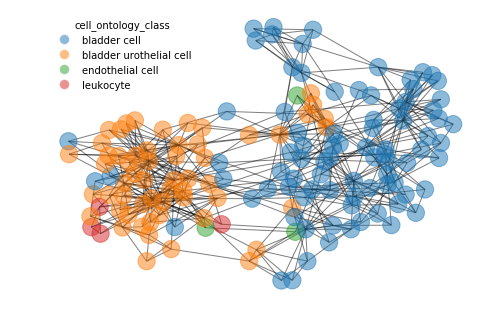

In [150]:
prefix = '/mnt/data/10X_P4_3/sourmash_compare/'
basename = 'possorted_genome_bam__k27_dna_ignore-abundance=False.csv'
csv = f'{prefix}{basename}'
bladder_abundance, bladder_abundance_metadata = sourmash_utils.read_compare(csv)



bladder_abundance_graph = knn.nearest_neighbor_graph(bladder_abundance, bladder_abundance_metadata)

bladder_abundance_graph_pos = nx.spring_layout(bladder_abundance_graph, seed=0)

knn.draw_graph(bladder_abundance_graph, pos=bladder_abundance_graph_pos)

In [151]:
bladder_cell_abundance = sourmash_utils.get_single_cell(
    sourmash_utils.BLADDER_CELL_ID, bladder_abundance,
                              bladder_abundance_metadata, name='bladder_dna_k27_ignore',
                              ksize=27, ignore_abundance=True)
bladder_cell_abundance.head(10)

,similarity,cell_ontology_class,free_annotation,mouse_id,tissue,cell_ontology_free_annotation,method,cell_ontology_class_color,name,ksize,ignore_abundance
cell_id,,,,,,,,,,,
10X_P4_3_GCGAGAACACATGGGA,1.000000,bladder cell,Bladder_mesenchymal_cell,3-M-8,Bladder,bladder_cell (Bladder_mesenchymal_cell),10x,#1f77b4,bladder_dna_k27_ignore,27,True
10X_P4_3_CGTCCATAGTCCTCCT,0.213957,bladder cell,Bladder_mesenchymal_cell,3-M-8,Bladder,bladder_cell (Bladder_mesenchymal_cell),10x,#1f77b4,bladder_dna_k27_ignore,27,True
10X_P4_3_CGGGTCATCGTGGACC,0.198214,bladder cell,Bladder_mesenchymal_cell,3-M-8,Bladder,bladder_cell (Bladder_mesenchymal_cell),10x,#1f77b4,bladder_dna_k27_ignore,27,True
10X_P4_3_GAGGTGATCCAGTATG,0.171757,bladder cell,Bladder_mesenchymal_cell,3-M-8,Bladder,bladder_cell (Bladder_mesenchymal_cell),10x,#1f77b4,bladder_dna_k27_ignore,27,True
10X_P4_3_CACCTTGAGGACCACA,0.169694,bladder cell,Bladder_mesenchymal_cell,3-M-8,Bladder,bladder_cell (Bladder_mesenchymal_cell),10x,#1f77b4,bladder_dna_k27_ignore,27,True
10X_P4_3_TAGCCGGAGGACTGGT,0.165674,bladder cell,Bladder_mesenchymal_cell,3-M-8,Bladder,bladder_cell (Bladder_mesenchymal_cell),10x,#1f77b4,bladder_dna_k27_ignore,27,True
10X_P4_3_CAGCTGGTCCTTTACA,0.164310,bladder cell,Bladder_mesenchymal_cell,3-M-8,Bladder,bladder_cell (Bladder_mesenchymal_cell),10x,#1f77b4,bladder_dna_k27_ignore,27,True
10X_P4_3_TAGGCATTCTATCCTA,0.158847,bladder urothelial cell,Luminal_bladder_epithelial_cell,3-M-8,Bladder,bladder_urothelial_cell (Luminal_bladder_epith...,10x,#ff7f0e,bladder_dna_k27_ignore,27,True
10X_P4_3_CTCGTACTCAATACCG,0.155376,bladder cell,Bladder_mesenchymal_cell,3-M-8,Bladder,bladder_cell (Bladder_mesenchymal_cell),10x,#1f77b4,bladder_dna_k27_ignore,27,True


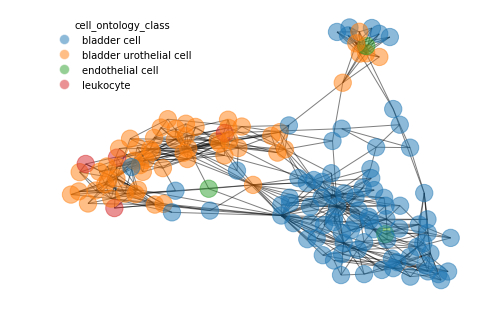

In [152]:
prefix = '/mnt/data/10X_P4_3/sourmash_compare/'
basename = 'possorted_genome_bam__k27_protein_ignore-abundance=False.csv'
csv = f'{prefix}{basename}'
bladder_abundance, bladder_abundance_metadata = sourmash_utils.read_compare(csv)



bladder_abundance_graph = knn.nearest_neighbor_graph(bladder_abundance, bladder_abundance_metadata)

bladder_abundance_graph_pos = nx.spring_layout(bladder_abundance_graph, seed=0)


knn.draw_graph(bladder_abundance_graph, pos=bladder_abundance_graph_pos)

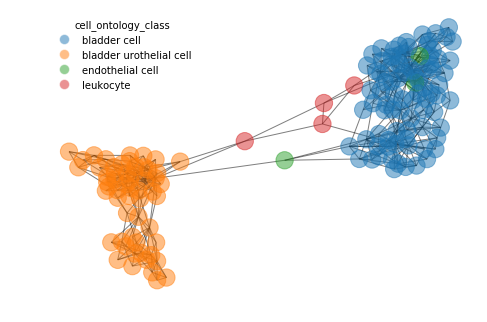

In [153]:
prefix = '/mnt/data/10X_P4_3/sourmash_compare/'
basename = 'possorted_genome_bam__k27_protein_ignore-abundance=True.csv'
csv = f'{prefix}{basename}'
bladder_abundance, bladder_abundance_metadata = sourmash_utils.read_compare(csv)

bladder_abundance_graph = knn.nearest_neighbor_graph(bladder_abundance, bladder_abundance_metadata)
bladder_abundance_graph_pos = nx.spring_layout(bladder_abundance_graph, seed=0)
knn.draw_graph(bladder_abundance_graph, pos=bladder_abundance_graph_pos)

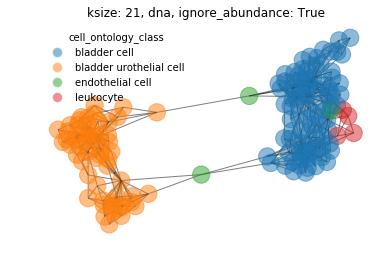

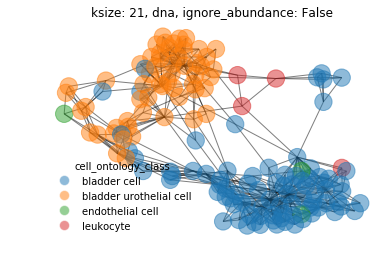

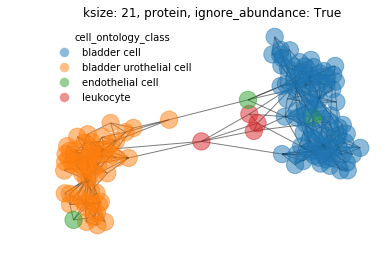

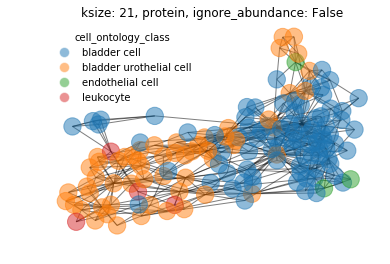

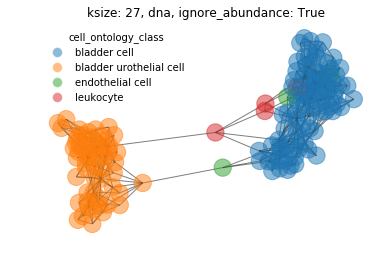

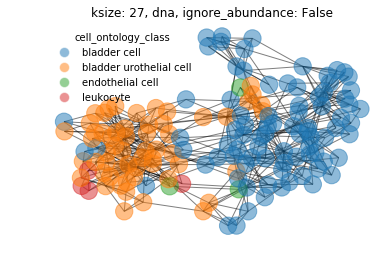

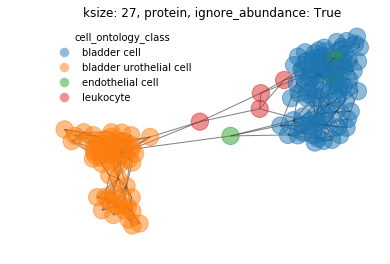

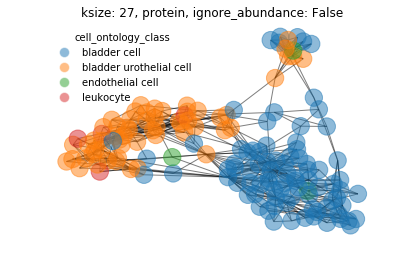

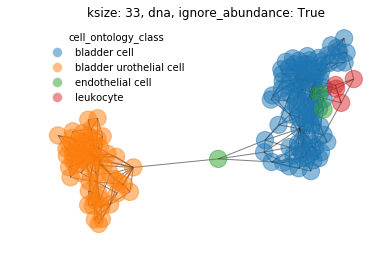

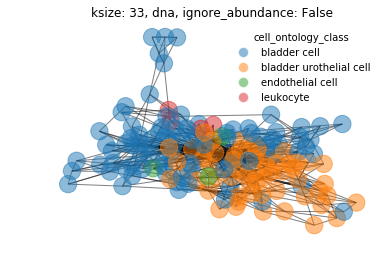

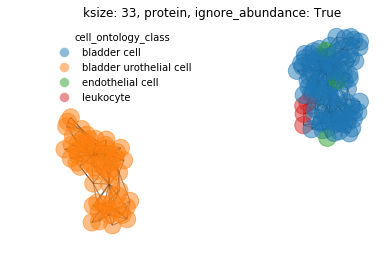

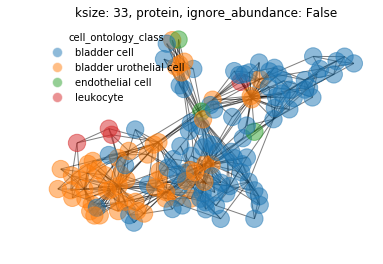

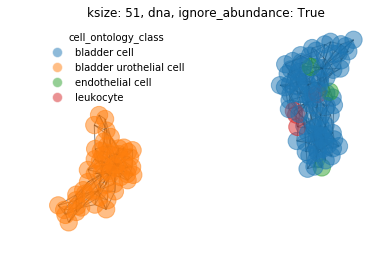

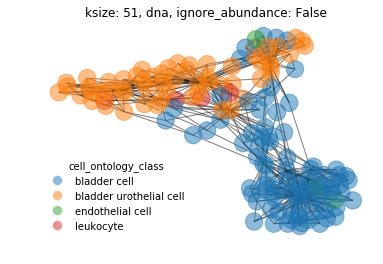

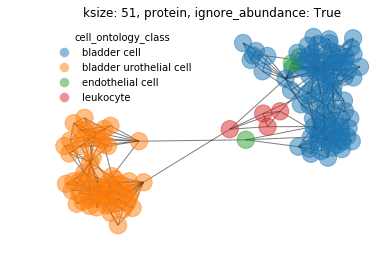

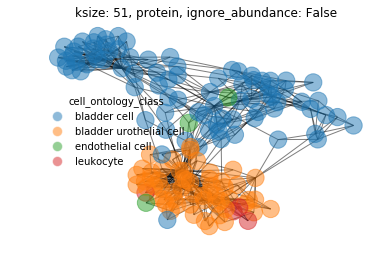

In [162]:
import itertools


import matplotlib.pyplot as plt

ksizes = 21, 27, 33, 51
molecules = 'dna', 'protein'
ignore_abundances = True, False

sample_name = 'bladder_10X_P4_3_scale=1000'

iterator = itertools.product(ksizes, molecules, ignore_abundances)

for ksize, molecule, ignore_abundance in iterator:
    prefix = '/mnt/data/10X_P4_3/sourmash_compare/'
    basename = f'possorted_genome_bam__k{ksize}_{molecule}_ignore-abundance={ignore_abundance}.csv'
    csv = f'{prefix}{basename}'

    bladder_abundance, bladder_abundance_metadata = sourmash_utils.read_compare(csv)

    bladder_abundance_graph = knn.nearest_neighbor_graph(bladder_abundance, bladder_abundance_metadata)
    bladder_abundance_graph_pos = nx.spring_layout(bladder_abundance_graph, seed=0)
    
    
    
    fig, ax = plt.subplots()
    knn.draw_graph(bladder_abundance_graph, pos=bladder_abundance_graph_pos)
    ax = plt.gca()
    
    title = f'ksize: {ksize}, {molecule}, ignore_abundance: {ignore_abundance}'
    ax.set(title=title)
    figure_suffix = f'knn_k{ksize}_{molecule}_ignore-abundance={ignore_abundance}.pdf'
    fig.savefig(f'{figure_folder}/{sample_name}_{figure_suffix}')

In [ ]:
import itertools


import matplotlib.pyplot as plt

ksizes = 21, 27, 33, 51
molecules = 'dna', 'protein'
ignore_abundances = True, False

sample_folders = ('/mnt/data/10X_P4_3/sourmash_compare/', '/mnt/data/10X_P4_3/sourmash_compare/',
                 '/mnt/data/10X_P7_8/sourmash_compare/')
sample_names = ('bladder_10X_P4_3_scale=1000', 'bladder_10X_P4_3_num-hashes=10000', 
               'lung_10X_P7_8_scale=1000')
    
sample_templates = ('possorted_genome_bam__k{ksize}_{molecule}_ignore-abundance={ignore_abundance}.csv',
    'possorted_genome_bam_num_hashes=10000___k{ksize}_{molecule}_ignore-abundance={ignore_abundance}.csv',
                   'scaled=1000_num_hashes=0_{molecule}_ksize={ksize}_ignore_abundance={ignore_abundance}.csv')


for sample_name, folder, template in zip(sample_names, sample_folders, sample_templates):
    print(f'sample_name: {sample_name}')
    
    iterator = itertools.product(ksizes, molecules, ignore_abundances)
    
    for ksize, molecule, ignore_abundance in iterator:
        basename = template.format(ksize=ksize, molecule=molecule, ignore_abundance=ignore_abundance)
        csv = f'{folder}{basename}'
#         print(csv)
        
        data, metadata = sourmash_utils.read_compare(csv)

        n_neighbors = 5 if 'bladder'in sample_name else 15
        
        graph = knn.nearest_neighbor_graph(data, metadata, n_neighbors=n_neighbors)
        pos = nx.spring_layout(graph, seed=0)

        fig, ax = plt.subplots()
        knn.draw_graph(graph, pos=pos, legend=True)
        ax = plt.gca()

        title = f'{sample_name}\nksize: {ksize}, {molecule}, ignore_abundance: {ignore_abundance}\nn_neighbors: {n_neighbors}'
        ax.set(title=title)
        figure_suffix = f'knn_k{ksize}_{molecule}_ignore-abundance={ignore_abundance}.pdf'
        pdf = f'{figure_folder}/{sample_name}_{figure_suffix}'
        fig.savefig(pdf)

sample_name: bladder_10X_P4_3_scale=1000
sample_name: bladder_10X_P4_3_num-hashes=10000
sample_name: lung_10X_P7_8_scale=1000


In [ ]:
prefix = '/mnt/data/10X_P4_3/sourmash_compare/'
basename = 'possorted_genome_bam__k21_protein_ignore-abundance=True.csv'
csv = f'{prefix}{basename}'
bladder_abundance, bladder_abundance_metadata = sourmash_utils.read_compare(csv)

bladder_abundance_graph = nearest_neighbor_graph(bladder_abundance, bladder_abundance_metadata)
bladder_abundance_graph_pos = nx.spring_layout(bladder_abundance_graph, seed=0)
draw_graph(bladder_abundance_graph, pos=bladder_abundance_graph_pos)